# Task 4: Spectrogram

### Subtask 1: Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum

Populating the interactive namespace from numpy and matplotlib


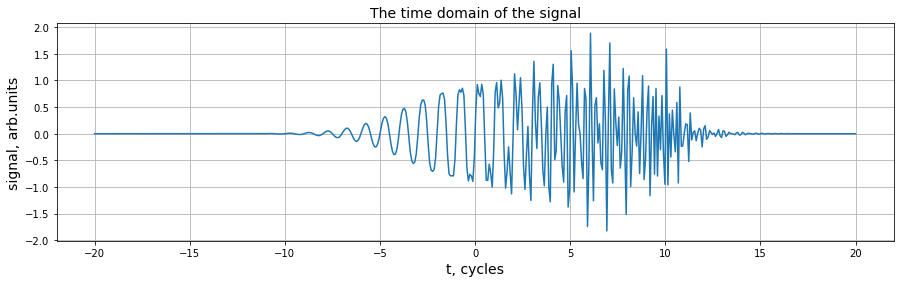

In [122]:
%pylab inline
# generate the time space (time * 2 * pi)
timeMin = -20
timeMax = 20
n_samples = 2**9
t = 2 * pi * np.linspace(timeMin, timeMax, n_samples)

# np.sin(F * t) * exp(-(t - t_shift)**2 / 2 / gain**2)
# F - frequency [Hz]
# t - time [cycles] - time * 2*pi
# t_shift - time shift relating 0 (<0 - right; >0 - left) [cycles]
# gain - decay rate: less gain - higher decay
y = 0 # zero signal
y += np.sin(1.0 * t) * exp(-(t - 0 * 2 * pi)**2 / 2 / 20**2) # 1st wawve packet
y += np.sin(3.0 * t) * exp(-(t - 5 * 2 * pi)**2 / 2 / 20**2) # 2nd wawve packet
y += np.sin(5.5 * t) * exp(-(t - 10 * 2 * pi)**2 / 2 /5**2)  # 3rd wawve packet

y += np.sin(4.0 * t) * exp(-(t - 7 * 2 * pi)**2 / 2 / 15**2) # 4th wawve packet (added)



plt.figure(figsize=(15, 4))
plt.title('The time domain of the signal', fontsize=14);
plt.plot(t / 2 / pi, y)
#xlim((-5, 500))
#ylim(-0.1, 1)
xlabel('t, cycles', fontsize=14)
ylabel('signal, arb.units', fontsize=14)
plt.grid()
plt.show()

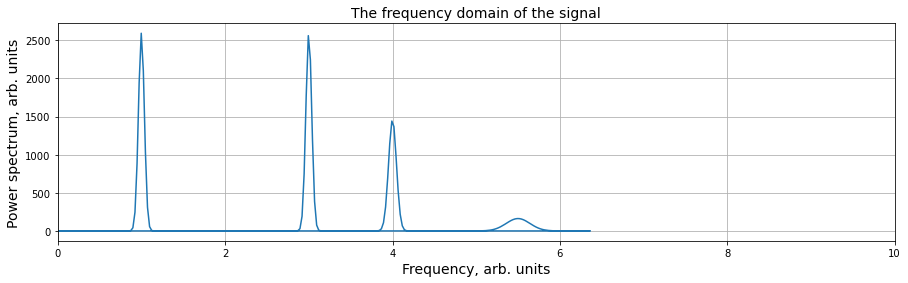

In [123]:
# Fourier spectrum
spectrum = fft.fft(y) # get spectrum
w = fft.fftfreq(len(y), d = (t[1]-t[0]) / 2 / pi) # len(y), sample space - get freq axis values

plt.figure(figsize=(15, 4))
plt.title('The frequency domain of the signal', fontsize=14)
plot(w, abs(spectrum)**2) # print symmetric spextrum around zero frequency
xlim(0, 10)
#ylim(-0.1, 1)
xlabel('Frequency, arb. units', fontsize=14)
ylabel('Power spectrum, arb. units', fontsize=14)
plt.grid()
plt.show()

### Subtask 2: Implement the spectrogram, show the effect of 1 on the spectrogram. Don’t forget to label the axes

In [124]:
from numba import njit

@njit(fastmath=True)
def get_windowed(y = y, wind_pos_start = -20.0 * 2 * pi, wind_pos_stop = 20.0 * 2 * pi, window_width = 1.0 * 2 * pi):
    array = [] # array for all window positionns time-domain functions
    # for all window positions
    for wind_pos in arange(wind_pos_start, wind_pos_stop, (t[1]-t[0])):
        window_function = exp(-(t - wind_pos)**2 / 2 / window_width**2) # define current window function
        y_window = y * window_function # find result of windowing
        array.append(y_window) # add windowed function into array
    return array

def get_specgram(wind_pos_start = -20.0 * 2 * pi, wind_pos_stop = 20.0 * 2 * pi, window_width = 1.0 * 2 * pi):
    # get windowed function
    array = get_windowed(y = y, wind_pos_start = wind_pos_start, wind_pos_stop = wind_pos_stop, window_width = window_width)
    spect = [] # array for all window positionns spectrum 
    arr = np.array(array)
    # for all window positions
    for i in range(arr.shape[0]):
        y_window = arr[i] # use current windowing result
        spectrum = fft.fft(y_window) # get spectrum
        spect.append(abs(spectrum[0:int(spectrum.shape[0] / 2 -1)])**2) # get one half of the spectrum
    spectrogram = np.array(spect)
    return spectrogram

Text(0, 0.5, 'Frequency, arb. units')

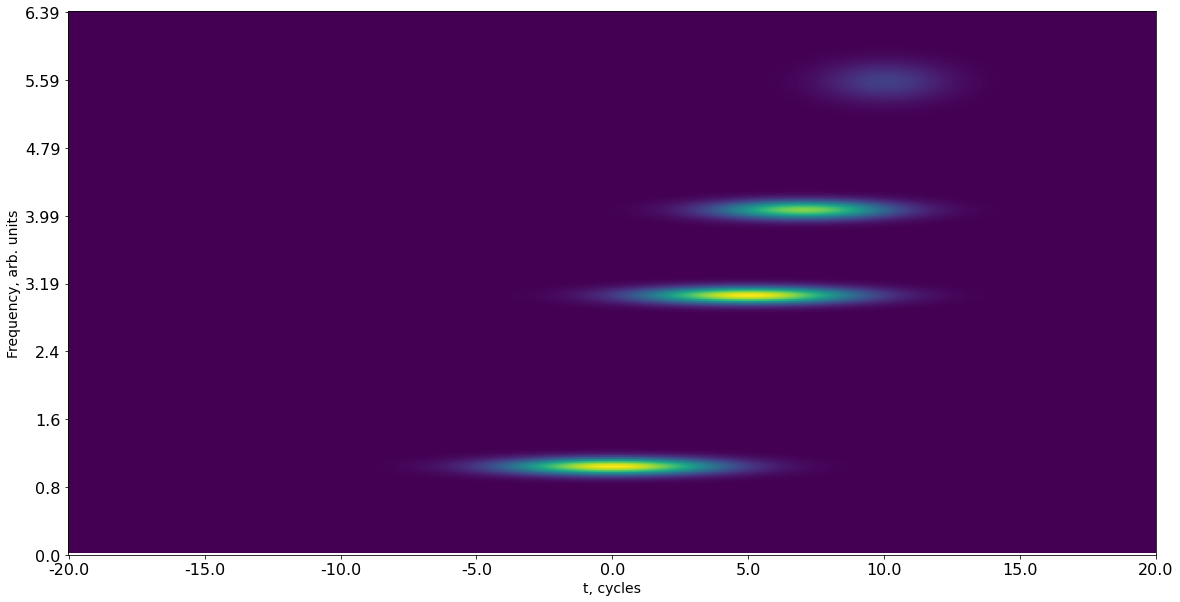

In [149]:
wind_pos_start = -20.0 * 2 * pi
wind_pos_stop = 20.0 * 2 * pi
window_width = 2.0 * 2 * pi

spectrogram = get_specgram(wind_pos_start = wind_pos_start, wind_pos_stop = wind_pos_stop, window_width = window_width)

plt.figure(figsize=(25, 10))
plt.imshow(np.rot90(spectrogram[0 : n_samples-1 : 1][:])) # choose intager sampling step for image
# colorbar()
plt.xticks(np.linspace(0, (spectrogram.shape[0] / n_samples) * n_samples-1, 9), np.round(np.linspace(-20, 20, 9),2), fontsize=16)
plt.yticks(np.linspace(0, n_samples / 2 -1, 9), np.round(np.linspace( n_samples / 80, 0, 9),2), fontsize=16) # 1024/80 - scale
xlabel('t, cycles', fontsize=14)
ylabel('Frequency, arb. units', fontsize=14)

### Subtask 3: Change the number of time steps in your signal to the power of 2 (i.e. 2**14) and then slightly change the number of timesteps. Measure the timing, can you explain the difference?

Populating the interactive namespace from numpy and matplotlib


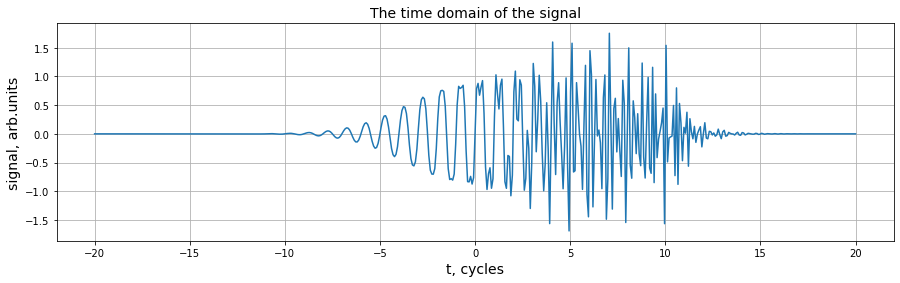

In [158]:
%pylab inline
# generate the time space (time * 2 * pi)
timeMin = -20
timeMax = 20
n_samples = 2**9-1
t = 2 * pi * np.linspace(timeMin, timeMax, n_samples)

# np.sin(F * t) * exp(-(t - t_shift)**2 / 2 / gain**2)
# F - frequency [Hz]
# t - time [cycles] - time * 2*pi
# t_shift - time shift relating 0 (<0 - right; >0 - left) [cycles]
# gain - decay rate: less gain - higher decay
y = 0 # zero signal
y += np.sin(1.0 * t) * exp(-(t - 0 * 2 * pi)**2 / 2 / 20**2) # 1st wawve packet
y += np.sin(3.0 * t) * exp(-(t - 5 * 2 * pi)**2 / 2 / 20**2) # 2nd wawve packet
y += np.sin(5.5 * t) * exp(-(t - 10 * 2 * pi)**2 / 2 /5**2)  # 3rd wawve packet
y += np.sin(4.0 * t) * exp(-(t - 7 * 2 * pi)**2 / 2 / 15**2) # 4th wawve packet (added)



plt.figure(figsize=(15, 4))
plt.title('The time domain of the signal', fontsize=14);
plt.plot(t / 2 / pi, y)
#xlim((-5, 500))
#ylim(-0.1, 1)
xlabel('t, cycles', fontsize=14)
ylabel('signal, arb.units', fontsize=14)
plt.grid()
plt.show()

In [159]:
from numba import njit

@njit(fastmath=True)
def get_windowed(y = y, wind_pos_start = -20.0 * 2 * pi, wind_pos_stop = 20.0 * 2 * pi, window_width = 1.0 * 2 * pi):
    array = [] # array for all window positionns time-domain functions
    # for all window positions
    for wind_pos in arange(wind_pos_start, wind_pos_stop, (t[1]-t[0])):
        window_function = exp(-(t - wind_pos)**2 / 2 / window_width**2) # define current window function
        y_window = y * window_function # find result of windowing
        array.append(y_window) # add windowed function into array
    return array

def get_specgram(wind_pos_start = -20.0 * 2 * pi, wind_pos_stop = 20.0 * 2 * pi, window_width = 1.0 * 2 * pi):
    # get windowed function
    array = get_windowed(y = y, wind_pos_start = wind_pos_start, wind_pos_stop = wind_pos_stop, window_width = window_width)
    spect = [] # array for all window positionns spectrum 
    arr = np.array(array)
    # for all window positions
    for i in range(arr.shape[0]):
        y_window = arr[i] # use current windowing result
        spectrum = fft.fft(y_window) # get spectrum
        spect.append(abs(spectrum[0:int(spectrum.shape[0] / 2 -1)])**2) # get one half of the spectrum
    spectrogram = np.array(spect)
    return spectrogram

In [160]:
wind_pos_start = -20.0 * 2 * pi
wind_pos_stop = 20.0 * 2 * pi
window_width = 2.0 * 2 * pi

print('n_samples =', n_samples)
%timeit get_specgram(wind_pos_start = wind_pos_start, wind_pos_stop = wind_pos_stop, window_width = window_width)

n_samples = 511
16.2 ms ± 219 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [134]:
print('n_samples =', n_samples)
%timeit get_specgram(wind_pos_start = wind_pos_start, wind_pos_stop = wind_pos_stop, window_width = window_width)

n_samples = 512
8.74 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [131]:
print('n_samples =', n_samples)
%timeit get_specgram(wind_pos_start = wind_pos_start, wind_pos_stop = wind_pos_stop, window_width = window_width)

n_samples = 4095
677 ms ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [128]:
print('n_samples =', n_samples)
%timeit get_specgram(wind_pos_start = wind_pos_start, wind_pos_stop = wind_pos_stop, window_width = window_width)

n_samples = 4096
586 ms ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Subtask 4: Parallel version of spectrogram implemented

In [57]:
%%writefile spectrogram.py

from scipy.fftpack import fft
import scipy.fftpack
import matplotlib.pyplot as plt
from mpi4py import MPI
import math
import numpy as np

pi = math.pi

# generate the time space (time * 2 * pi)
timeMin = -20
timeMax = 20
n_samples = 2**10
t = 2 * pi * np.linspace(timeMin, timeMax, n_samples)

# np.sin(F * t) * exp(-(t - t_shift)**2 / 2 / gain**2)
# F - frequency [Hz]
# t - time [cycles] - time * 2*pi
# t_shift - time shift relating 0 (<0 - right; >0 - left) [cycles]
# gain - decay rate: less gain - higher decay
y = 0 # zero signal
y += np.sin(1.0 * t) * np.exp(-(t - 0 * 2 * pi)**2 / 2 / 20**2) # 1st wawve packet
y += np.sin(3.0 * t) * np.exp(-(t - 5 * 2 * pi)**2 / 2 / 20**2) # 2nd wawve packet
y += np.sin(5.5 * t) * np.exp(-(t - 10 * 2 * pi)**2 / 2 /5**2)  # 3rd wawve packet
y += np.sin(4.0 * t) * np.exp(-(t - 7 * 2 * pi)**2 / 2 / 15**2) # 4th wawve packet (added)



wind_pos_start = -20.0 * 2 * pi
wind_pos_stop = 20.0 * 2 * pi
window_width = 2.0 * 2 * pi

def get_windowed(rank, n_proc, y = y, wind_pos_start = -20.0 * 2 * pi, wind_pos_stop = 20.0 * 2 * pi, window_width = 1.0 * 2 * pi):
    array = [] # array for all window positionns time-domain functions
    # for all window positions
    x_0 = wind_pos_start
    step = int(n_samples / n_proc)
    
    for i in range(step * rank, step * (rank+1), 1):
        wind_pos = x_0 + (t[1]-t[0]) * i
        
        window_function = np.exp(-(t - wind_pos)**2 / 2 / window_width**2) # define current window function
        y_window = y * window_function # find result of windowing
        array.append(y_window) # add windowed function into array
    return array

def get_specgram(rank, n_proc, wind_pos_start = -20.0 * 2 * pi, wind_pos_stop = 20.0 * 2 * pi, window_width = 1.0 * 2 * pi):
    # get windowed function
    array = get_windowed(rank = rank, n_proc = n_proc, y = y, wind_pos_start = wind_pos_start, wind_pos_stop = wind_pos_stop, window_width = window_width)
    spect = [] # array for all window positionns spectrum 
    arr = np.array(array)
    # for all window positions
    for i in range(arr.shape[0]):
        y_window = arr[i] # use current windowing result
        spectrum = scipy.fftpack.fft(y_window) # get spectrum
        spect.append(abs(spectrum[0:int(spectrum.shape[0] / 2 -1)])**2) # get one half of the spectrum
    spectrogram = np.array(spect)
    return spectrogram



comm = MPI.COMM_WORLD
n_proc = comm.Get_size() # processors
rank = comm.Get_rank() # current rank



if rank == 0:
    print('nprocs = ', n_proc)
    t0 = MPI.Wtime() # measure start time

spectrogram = get_specgram(rank = rank, n_proc = n_proc, wind_pos_start = wind_pos_start, wind_pos_stop = wind_pos_stop, window_width = window_width)
# X,Y = count(proc = rank, points_X = 1000, n_proc = n_proc, minX = 0, maxX = 4, steps = 500, m = 50)
spectrogram = comm.gather(spectrogram, root=0)

if rank == 0:
    a = []
    # get all parts of spectrogram
    for i in range(n_proc):
        a.append(np.rot90(spectrogram[i]))
    
    # spectrogram parts concatenation
    out = np.concatenate((a), axis=1)
    
    # total time of calculation
    totalTime = MPI.Wtime() - t0
    print(np.round((totalTime),4) * 1000, 'mSec')
    np.savez('Task_4/example_'+str(n_proc), totalTime = np.round((totalTime),4) * 1000)
    
    fig = plt.imshow(out)
    plt.xticks(np.linspace(0, n_samples-1, 9), np.round(np.linspace(-20, 20, 9),2), fontsize=14)
    plt.yticks(np.linspace(0, n_samples / 2 -1, 9), np.round(np.linspace( n_samples / 80, 0, 9),2), fontsize=14) # 1024/80 - scale
    plt.xlabel('t, cycles', fontsize=14)
    plt.ylabel('Frequency, arb. units', fontsize=14)
    plt.savefig('Task_4/SPECTR', dpi = 100)
    plt.close()

Overwriting spectrogram.py


nprocs =  5
22.4 mSec


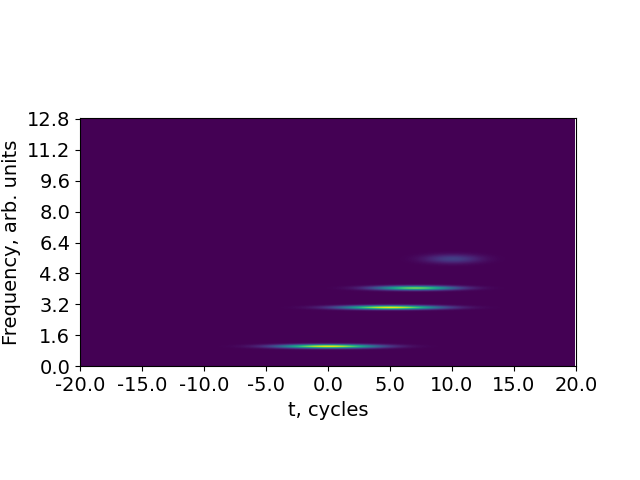

In [58]:
!mpiexec -n 5 python spectrogram.py
from IPython.display import Image
Image("Task_4/SPECTR.png")

### Subtask 5: Plot speedup vs the number of processors

In [59]:
!mpiexec -n 1 python spectrogram.py
!mpiexec -n 2 python spectrogram.py
!mpiexec -n 3 python spectrogram.py
!mpiexec -n 4 python spectrogram.py
!mpiexec -n 5 python spectrogram.py
!mpiexec -n 6 python spectrogram.py
!mpiexec -n 7 python spectrogram.py
!mpiexec -n 8 python spectrogram.py
!mpiexec -n 9 python spectrogram.py
!mpiexec -n 10 python spectrogram.py

nprocs =  1
63.4 mSec
nprocs =  2
35.1 mSec
nprocs =  3
28.0 mSec
nprocs =  4
23.900000000000002 mSec
nprocs =  5
22.599999999999998 mSec
nprocs =  6
22.4 mSec
nprocs =  7
25.7 mSec
nprocs =  8
26.9 mSec
nprocs =  9
25.3 mSec
nprocs =  10
25.5 mSec


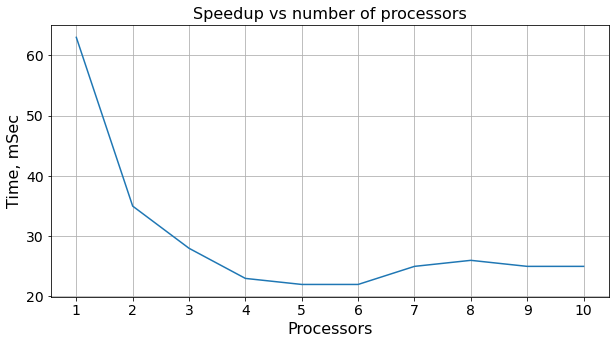

In [60]:
import numpy as np
import matplotlib.pyplot as plt

a = []
for i in range(1, 11, 1):
    ex = np.load('Task_4/example_'+str(i)+'.npz')
    a.append(int(ex['totalTime']))
    
plt.figure(figsize=(10, 5))
plt.title('Speedup vs number of processors', fontsize=16)
plt.ylabel('Time, mSec', fontsize=16)
plt.xlabel('Processors', fontsize=16)
plt.xticks(np.arange(0, 11), np.arange(1, 12), fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.plot(a)